In [ ]:
import pandas as pd

# Load the dataset directly from the URL
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [ ]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


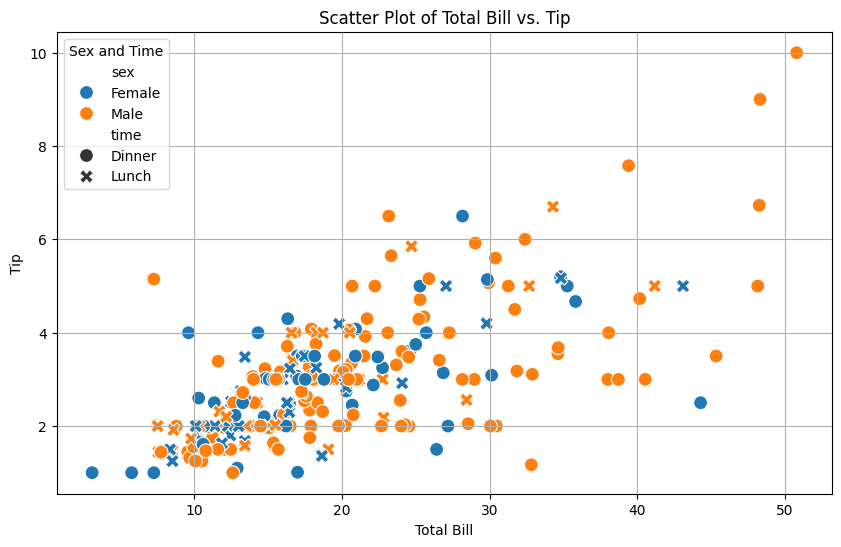

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for total_bill vs. tip
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_bill', y='tip', hue='sex', style='time', s=100)
plt.title('Scatter Plot of Total Bill vs. Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.legend(title='Sex and Time')
plt.grid(True)
plt.show()


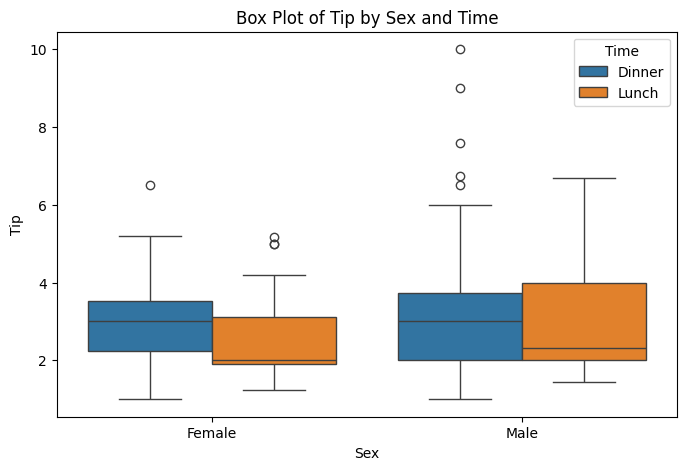

In [ ]:
# Box plot for sex vs. tip
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='sex', y='tip', hue='time')
plt.title('Box Plot of Tip by Sex and Time')
plt.ylabel('Tip')
plt.xlabel('Sex')
plt.legend(title='Time')
plt.show()


<ipython-input-34-0582e3e7fde8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_tips, x='time', y='tip', palette='viridis')


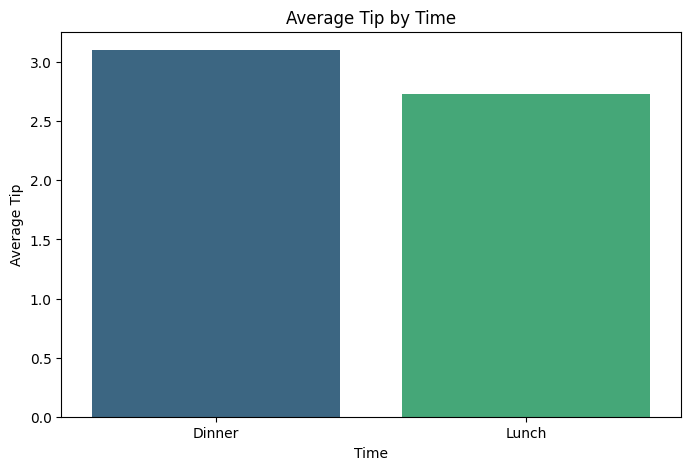

In [ ]:
# Calculate average tips by time
average_tips = df.groupby('time')['tip'].mean().reset_index()

# Bar plot for average tips by time
plt.figure(figsize=(8, 5))
sns.barplot(data=average_tips, x='time', y='tip', palette='viridis')
plt.title('Average Tip by Time')
plt.ylabel('Average Tip')
plt.xlabel('Time')
plt.show()


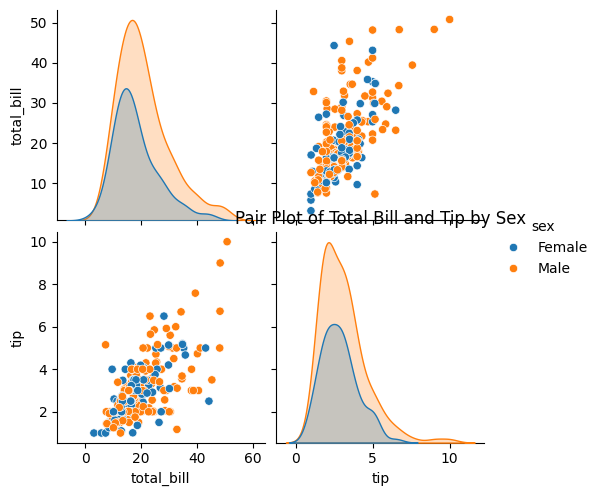

In [ ]:
# Pair plot for total_bill, tip and sex
sns.pairplot(df, hue='sex', vars=['total_bill', 'tip'])
plt.title('Pair Plot of Total Bill and Tip by Sex')
plt.show()


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [ ]:
df_cleaned = df.dropna()

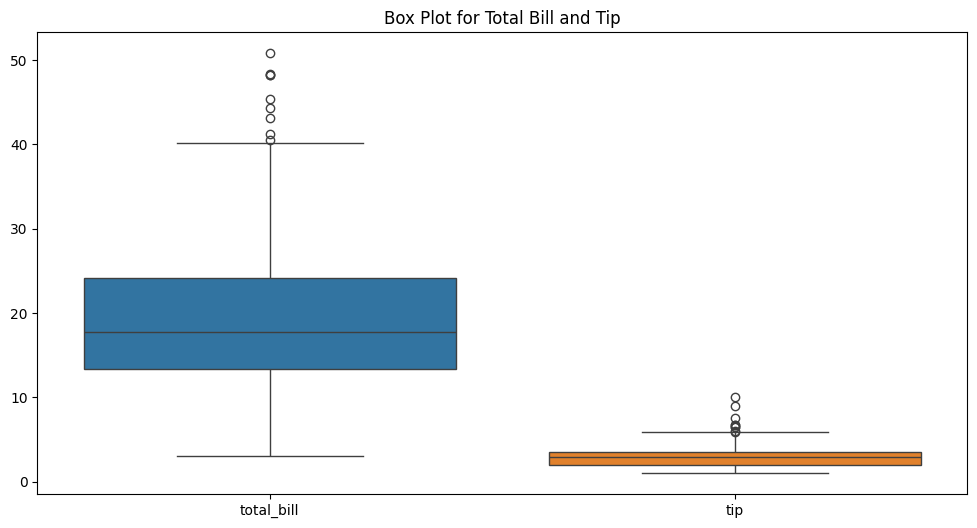

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['total_bill', 'tip']])
plt.title('Box Plot for Total Bill and Tip')
plt.show()


In [ ]:
# Calculate IQR for 'tip'
Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_no_outliers = df[(df['tip'] >= lower_bound) & (df['tip'] <= upper_bound)]


In [ ]:
# Verify the cleaned dataset
print("Shape of the cleaned dataset:", df_no_outliers.shape)
print("Missing Values in Each Column after cleaning:")
print(df_no_outliers.isnull().sum())


Shape of the cleaned dataset: (235, 7)
Missing Values in Each Column after cleaning:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


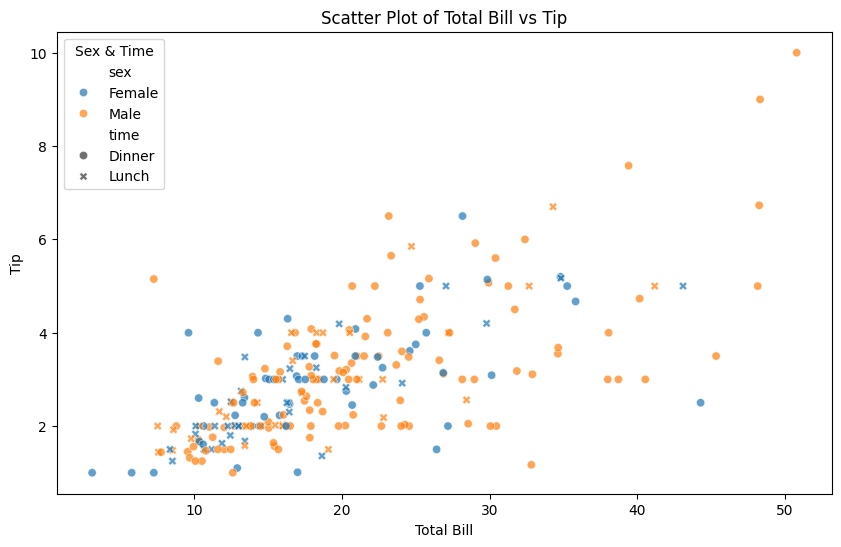

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for total_bill vs tip
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_bill', y='tip', hue='sex', style='time', alpha=0.7)
plt.title('Scatter Plot of Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.legend(title='Sex & Time')
plt.show()


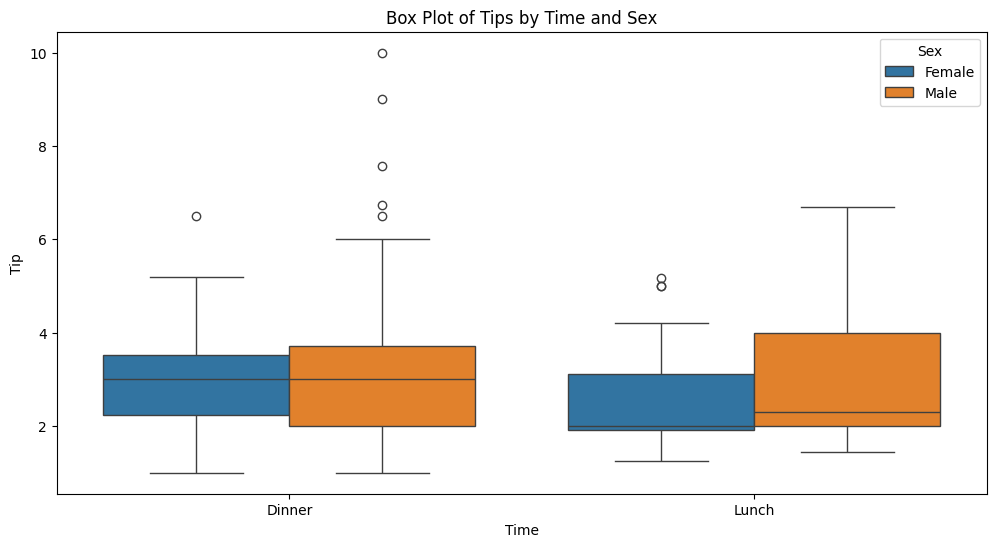

In [ ]:
# Box plot for tips based on sex and time
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='time', y='tip', hue='sex')
plt.title('Box Plot of Tips by Time and Sex')
plt.xlabel('Time')
plt.ylabel('Tip')
plt.legend(title='Sex')
plt.show()


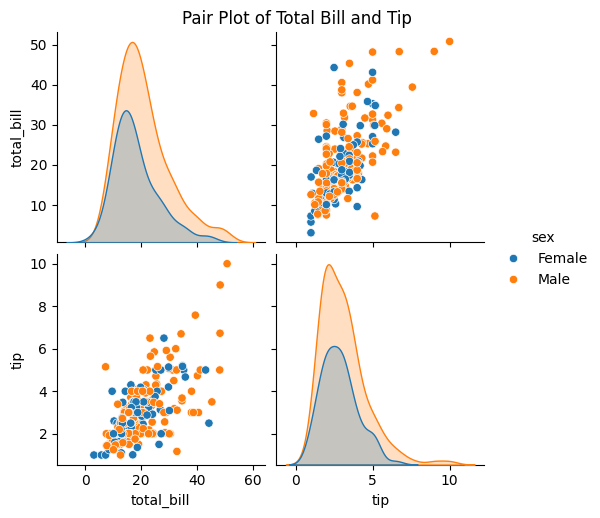

In [ ]:
# Pair plot to visualize relationships
sns.pairplot(df, vars=['total_bill', 'tip'], hue='sex')
plt.suptitle('Pair Plot of Total Bill and Tip', y=1.02)
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming df has the categorical columns 'sex' and 'time'
label_encoder = LabelEncoder()

# Convert 'sex' column to numerical values
df['sex'] = label_encoder.fit_transform(df['sex'])

# Convert 'time' column to numerical values
df['time'] = label_encoder.fit_transform(df['time'])

# Display the first few rows to verify the encoding
print(df.head())


   total_bill   tip  sex smoker  day  time  size
0       16.99  1.01    0     No  Sun     0     2
1       10.34  1.66    1     No  Sun     0     3
2       21.01  3.50    1     No  Sun     0     3
3       23.68  3.31    1     No  Sun     0     2
4       24.59  3.61    0     No  Sun     0     4


In [ ]:
# Define independent variables (features) and dependent variable (target)
X = df[['total_bill', 'sex', 'time']]
y = df['tip']

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict the target variable 'tip' on the testing set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate R-squared (R²) score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

# Compare predicted values with actual values by displaying a few examples
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())


Mean Squared Error (MSE): 0.5776259623899831
R-squared (R²): 0.5378886367479747
     Actual  Predicted
24     3.18   3.038792
6      2.00   1.851078
153    2.00   3.547199
211    5.16   3.691229
198    2.00   2.337583
